In [57]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from torch_geometric.datasets import KarateClub

import networkx as nx
import matplotlib.pyplot as plt

Planetoid Cora dataset

Epoch: 1, Accuracy: 0.4021
Epoch: 2, Accuracy: 0.4952
Epoch: 3, Accuracy: 0.5388
Epoch: 4, Accuracy: 0.5683
Epoch: 5, Accuracy: 0.6045
Epoch: 6, Accuracy: 0.6525
Epoch: 7, Accuracy: 0.6917
Epoch: 8, Accuracy: 0.7131
Epoch: 9, Accuracy: 0.7356
Epoch: 10, Accuracy: 0.7507
Epoch: 11, Accuracy: 0.7662
Epoch: 12, Accuracy: 0.7792
Epoch: 13, Accuracy: 0.7895
Epoch: 14, Accuracy: 0.7954
Epoch: 15, Accuracy: 0.7965
Epoch: 16, Accuracy: 0.8013
Epoch: 17, Accuracy: 0.8039
Epoch: 18, Accuracy: 0.8032
Epoch: 19, Accuracy: 0.8043
Epoch: 20, Accuracy: 0.8035
Epoch: 21, Accuracy: 0.8035
Epoch: 22, Accuracy: 0.8047
Epoch: 23, Accuracy: 0.8047
Epoch: 24, Accuracy: 0.8047
Epoch: 25, Accuracy: 0.8047
Epoch: 26, Accuracy: 0.8035
Epoch: 27, Accuracy: 0.8024
Epoch: 28, Accuracy: 0.8017
Epoch: 29, Accuracy: 0.8006
Epoch: 30, Accuracy: 0.8006
Epoch: 31, Accuracy: 0.8010
Epoch: 32, Accuracy: 0.8006
Epoch: 33, Accuracy: 0.8010
Epoch: 34, Accuracy: 0.8013
Epoch: 35, Accuracy: 0.8017
Epoch: 36, Accuracy: 0.8024
E

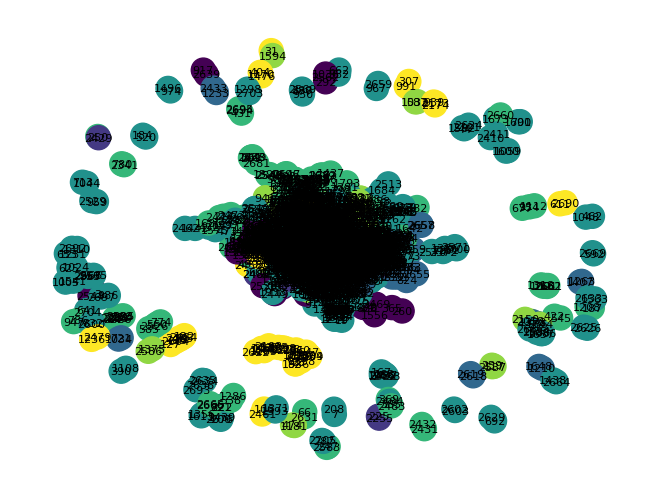

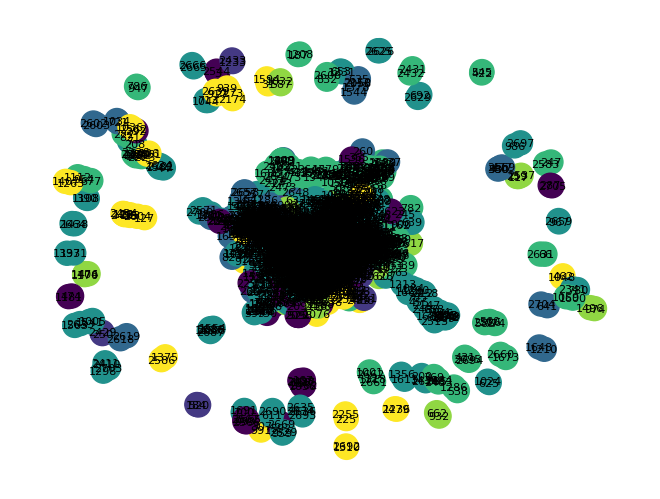

In [58]:
# Define the Graph Convolutional Network model
class GCN(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Load the dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Split the dataset into training set
data = dataset[0]
x, edge_index, y = data.x, data.edge_index, data.y
train_mask = data.train_mask

# Create the model and define the optimizer
model = GCN(dataset.num_features, hidden_dim=16, num_classes=dataset.num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Create the loss function
criterion = nn.CrossEntropyLoss()

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    output = model(x, edge_index)
    loss = criterion(output[train_mask], y[train_mask])
    loss.backward()
    optimizer.step()

# Evaluation function
def evaluate():
    model.eval()
    output = model(x, edge_index)
    pred = output.argmax(dim=1)
    acc = pred.eq(y).sum().item() / y.size(0)
    return acc

# Train and evaluate the model
accuracies = []
for epoch in range(200):
    train()
    acc = evaluate()
    accuracies.append(acc)
    print(f'Epoch: {epoch+1}, Accuracy: {acc:.4f}')

# Calculate average accuracy
avg_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {avg_accuracy:.4f}')

#Reference Graph
# Convert edge_index to edge list format
edges = edge_index.t().tolist()

# Create a networkx graph object
G = nx.Graph(edges)

# Draw the graph
pos = nx.spring_layout(G)
node_colors = [y[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=300, font_size=8)

# Show the graph
plt.show()

#Predicted Graph
# Get the predicted labels for all nodes
model.eval()
output = model(x, edge_index)
pred_labels = output.argmax(dim=1)

# Convert edge_index to edge list format for the predicted graph
pred_edges = edge_index.t().tolist()

# Create a networkx graph object
G = nx.Graph(pred_edges)

# Create a networkx graph object for the predicted graph
pred_G = nx.Graph(pred_edges)

# Assign the predicted labels as node attributes in the predicted graph
labels = {}
for node, label in enumerate(pred_labels):
    labels[node] = label.item()
nx.set_node_attributes(pred_G, labels, 'label')

# Draw the predicted graph with different node colors based on predicted labels
pos_pred = nx.spring_layout(pred_G)
node_colors = [pred_G.nodes[node]['label'] for node in pred_G.nodes()]
nx.draw(pred_G, pos_pred, with_labels=True, node_color=node_colors, edge_color='gray', node_size=300, font_size=8)

# Show the predicted graph
plt.show()

Planetoid CiteSeer dataset

Epoch: 1, Accuracy: 0.4271
Epoch: 2, Accuracy: 0.4214
Epoch: 3, Accuracy: 0.4088
Epoch: 4, Accuracy: 0.4587
Epoch: 5, Accuracy: 0.5215
Epoch: 6, Accuracy: 0.5708
Epoch: 7, Accuracy: 0.5975
Epoch: 8, Accuracy: 0.6195
Epoch: 9, Accuracy: 0.6414
Epoch: 10, Accuracy: 0.6501
Epoch: 11, Accuracy: 0.6489
Epoch: 12, Accuracy: 0.6540
Epoch: 13, Accuracy: 0.6549
Epoch: 14, Accuracy: 0.6567
Epoch: 15, Accuracy: 0.6592
Epoch: 16, Accuracy: 0.6598
Epoch: 17, Accuracy: 0.6616
Epoch: 18, Accuracy: 0.6628
Epoch: 19, Accuracy: 0.6640
Epoch: 20, Accuracy: 0.6625
Epoch: 21, Accuracy: 0.6616
Epoch: 22, Accuracy: 0.6598
Epoch: 23, Accuracy: 0.6601
Epoch: 24, Accuracy: 0.6580
Epoch: 25, Accuracy: 0.6570
Epoch: 26, Accuracy: 0.6604
Epoch: 27, Accuracy: 0.6604
Epoch: 28, Accuracy: 0.6616
Epoch: 29, Accuracy: 0.6625
Epoch: 30, Accuracy: 0.6640
Epoch: 31, Accuracy: 0.6667
Epoch: 32, Accuracy: 0.6670
Epoch: 33, Accuracy: 0.6685
Epoch: 34, Accuracy: 0.6667
Epoch: 35, Accuracy: 0.6664
Epoch: 36, Accuracy: 0.6673
E

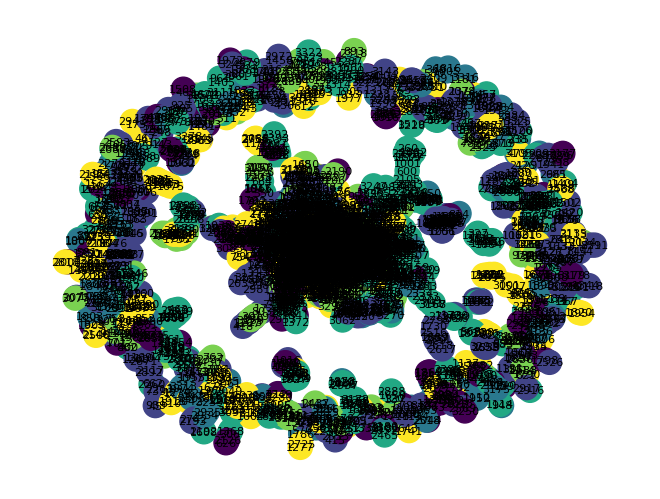

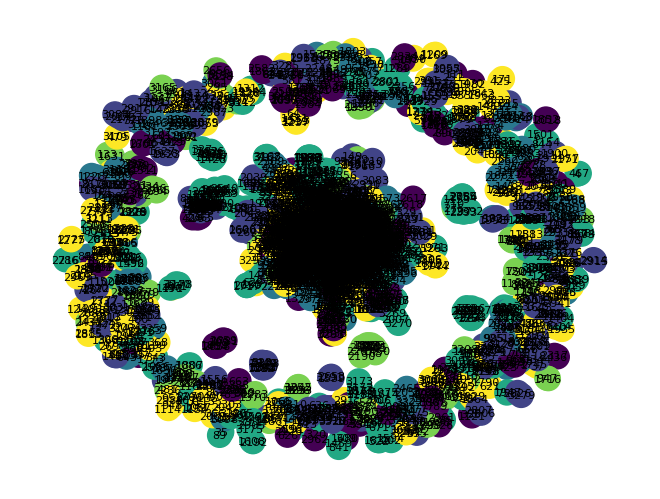

In [59]:
# Define the Graph Convolutional Network model
class GCN(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Load the dataset
dataset = Planetoid(root='/tmp/CiteSeer', name='CiteSeer')

# Split the dataset into training set
data = dataset[0]
x, edge_index, y = data.x, data.edge_index, data.y
train_mask = data.train_mask

# Create the model and define the optimizer
model = GCN(dataset.num_features, hidden_dim=16, num_classes=dataset.num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Create the loss function
criterion = nn.CrossEntropyLoss()

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    output = model(x, edge_index)
    loss = criterion(output[train_mask], y[train_mask])
    loss.backward()
    optimizer.step()

# Evaluation function
def evaluate():
    model.eval()
    output = model(x, edge_index)
    pred = output.argmax(dim=1)
    acc = pred.eq(y).sum().item() / y.size(0)
    return acc

# Train and evaluate the model
accuracies = []
for epoch in range(200):
    train()
    acc = evaluate()
    accuracies.append(acc)
    print(f'Epoch: {epoch+1}, Accuracy: {acc:.4f}')

# Calculate average accuracy
avg_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {avg_accuracy:.4f}')

#Reference Graph
# Convert edge_index to edge list format
edges = edge_index.t().tolist()

# Create a networkx graph object
G = nx.Graph(edges)

# Draw the graph
pos = nx.spring_layout(G)
node_colors = [y[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=300, font_size=8)

# Show the graph
plt.show()

#Predicted Graph
# Get the predicted labels for all nodes
model.eval()
output = model(x, edge_index)
pred_labels = output.argmax(dim=1)

# Convert edge_index to edge list format for the predicted graph
pred_edges = edge_index.t().tolist()

# Create a networkx graph object
G = nx.Graph(pred_edges)

# Create a networkx graph object for the predicted graph
pred_G = nx.Graph(pred_edges)

# Assign the predicted labels as node attributes in the predicted graph
labels = {}
for node, label in enumerate(pred_labels):
    labels[node] = label.item()
nx.set_node_attributes(pred_G, labels, 'label')

# Draw the predicted graph with different node colors based on predicted labels
pos_pred = nx.spring_layout(pred_G)
node_colors = [pred_G.nodes[node]['label'] for node in pred_G.nodes()]
nx.draw(pred_G, pos_pred, with_labels=True, node_color=node_colors, edge_color='gray', node_size=300, font_size=8)

# Show the predicted graph
plt.show()

Karate Club dataset

Epoch: 1, Accuracy: 0.5294
Epoch: 2, Accuracy: 0.6471
Epoch: 3, Accuracy: 0.6765
Epoch: 4, Accuracy: 0.7059
Epoch: 5, Accuracy: 0.6765
Epoch: 6, Accuracy: 0.6765
Epoch: 7, Accuracy: 0.6765
Epoch: 8, Accuracy: 0.6765
Epoch: 9, Accuracy: 0.6765
Epoch: 10, Accuracy: 0.6765
Epoch: 11, Accuracy: 0.6765
Epoch: 12, Accuracy: 0.6765
Epoch: 13, Accuracy: 0.6765
Epoch: 14, Accuracy: 0.6765
Epoch: 15, Accuracy: 0.7059
Epoch: 16, Accuracy: 0.7059
Epoch: 17, Accuracy: 0.7059
Epoch: 18, Accuracy: 0.7059
Epoch: 19, Accuracy: 0.7059
Epoch: 20, Accuracy: 0.7059
Epoch: 21, Accuracy: 0.7059
Epoch: 22, Accuracy: 0.7353
Epoch: 23, Accuracy: 0.7353
Epoch: 24, Accuracy: 0.7941
Epoch: 25, Accuracy: 0.7941
Epoch: 26, Accuracy: 0.8529
Epoch: 27, Accuracy: 0.8824
Epoch: 28, Accuracy: 0.8529
Epoch: 29, Accuracy: 0.8529
Epoch: 30, Accuracy: 0.8235
Epoch: 31, Accuracy: 0.7941
Epoch: 32, Accuracy: 0.7941
Epoch: 33, Accuracy: 0.7941
Epoch: 34, Accuracy: 0.7941
Epoch: 35, Accuracy: 0.7941
Epoch: 36, Accuracy: 0.7941
E

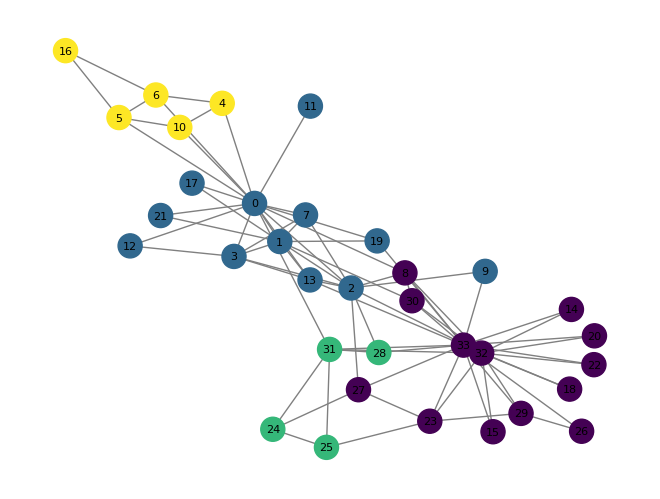

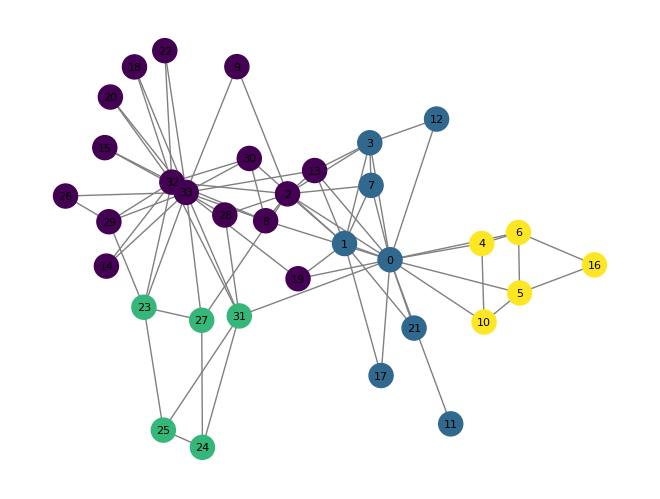

In [64]:
# Define the Graph Convolutional Network model
class GCN(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Load the dataset
dataset = KarateClub()

# Split the dataset into training set
data = dataset[0]
x, edge_index, y = data.x, data.edge_index, data.y
train_mask = data.train_mask

# Create the model and define the optimizer
model = GCN(dataset.num_features, hidden_dim=16, num_classes=dataset.num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Create the loss function
criterion = nn.CrossEntropyLoss()

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    output = model(x, edge_index)
    loss = criterion(output[train_mask], y[train_mask])
    loss.backward()
    optimizer.step()

# Evaluation function
def evaluate():
    model.eval()
    output = model(x, edge_index)
    pred = output.argmax(dim=1)
    acc = pred.eq(y).sum().item() / y.size(0)
    return acc

# Train and evaluate the model
accuracies = []
for epoch in range(200):
    train()
    acc = evaluate()
    accuracies.append(acc)
    print(f'Epoch: {epoch+1}, Accuracy: {acc:.4f}')

# Calculate average accuracy
avg_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {avg_accuracy:.4f}')

#Reference Graph
# Convert edge_index to edge list format
edges = edge_index.t().tolist()

# Create a networkx graph object
G = nx.Graph(edges)

# Draw the graph
pos = nx.spring_layout(G)
node_colors = [y[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=300, font_size=8)

# Show the graph
plt.show()

#Predicted Graph
# Get the predicted labels for all nodes
model.eval()
output = model(x, edge_index)
pred_labels = output.argmax(dim=1)

# Convert edge_index to edge list format for the predicted graph
pred_edges = edge_index.t().tolist()

# Create a networkx graph object
G = nx.Graph(pred_edges)

# Create a networkx graph object for the predicted graph
pred_G = nx.Graph(pred_edges)

# Assign the predicted labels as node attributes in the predicted graph
labels = {}
for node, label in enumerate(pred_labels):
    labels[node] = label.item()
nx.set_node_attributes(pred_G, labels, 'label')

# Draw the predicted graph with different node colors based on predicted labels
pos_pred = nx.spring_layout(pred_G)
node_colors = [pred_G.nodes[node]['label'] for node in pred_G.nodes()]
nx.draw(pred_G, pos_pred, with_labels=True, node_color=node_colors, edge_color='gray', node_size=300, font_size=8)

# Show the predicted graph
plt.show()